Pearson correlation coefficient ρ=1/2 is much closer to ρ=0 than to a ρ=1.
There is also a huge difference between a ρ=0.9 and ρ=0.99
ρ = 0


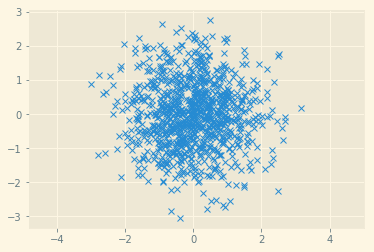

ρ = 0.5


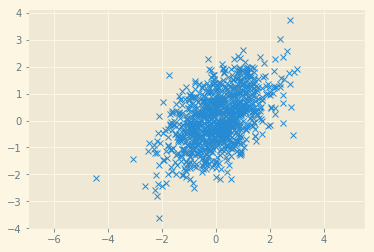

ρ = 0.6


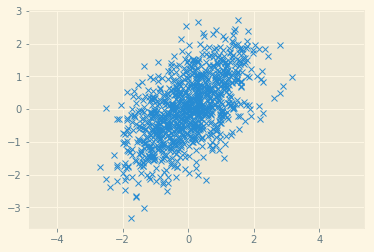

ρ = 0.8


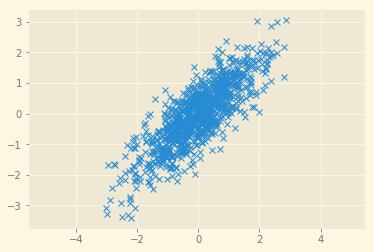

ρ = 0.9


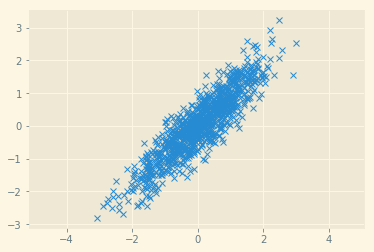

ρ = 0.99


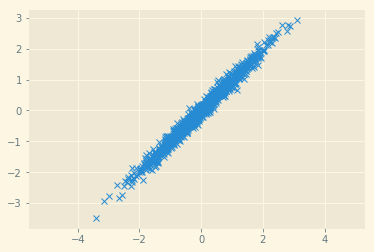

ρ = 0.9999


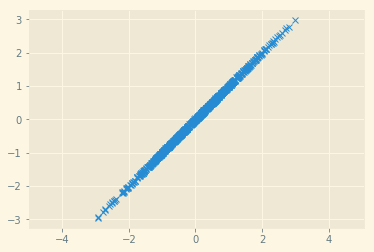

In [2]:
# notebook based on Taleb's tweet: https://twitter.com/nntaleb/status/1150457625877864450
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
plt.style.use('Solarize_Light2')

def plot_bivariate_normal_with_correlation(correlation, size):
  mean = [0, 0]
  cov = [[1, correlation], 
         [correlation, 1]]  # diagonal covariance
  x, y = np.random.multivariate_normal(mean, cov, size, 'raise').T

  plt.plot(x, y, 'x')
  plt.axis('equal')
  plt.show()
  
pearson_correlation = [0, 0.5, 0.6, 0.8, 0.9, 0.99, 0.9999]

print('Pearson correlation coefficient ρ=1/2 is much closer to ρ=0 than to a ρ=1.')
print('There is also a huge difference between a ρ=0.9 and ρ=0.99')

size = 1000
for x in pearson_correlation:
  print("ρ =", x)
  plot_bivariate_normal_with_correlation(x, size)
  

Mutual Information scales to noise: correlation of 0.47 is half the information of 0.62


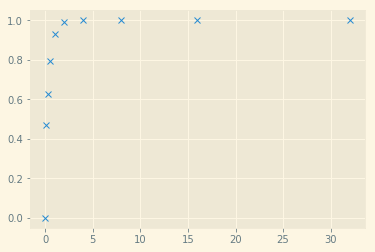

Mutual information 0
Pearson correlation 0.0


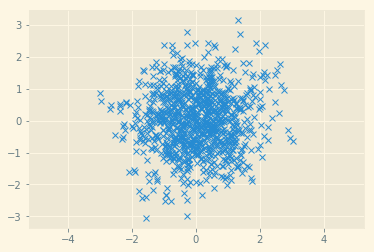

Mutual information 0.125
Pearson correlation 0.47031820816187325


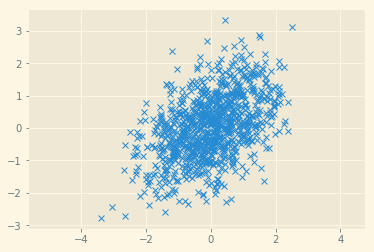

Mutual information 0.25
Pearson correlation 0.6272713450233213


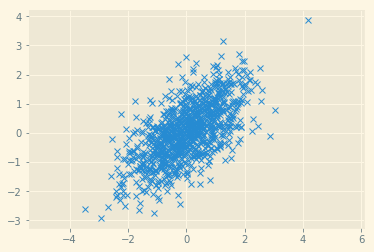

Mutual information 0.5
Pearson correlation 0.7950600976206501


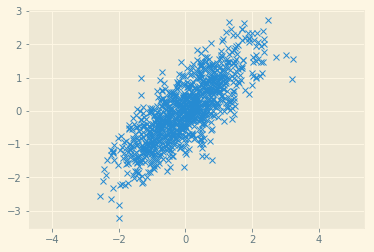

Mutual information 1
Pearson correlation 0.9298734950321937


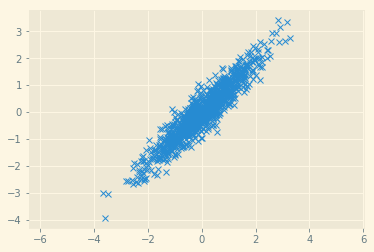

Mutual information 2
Pearson correlation 0.9907998592608226


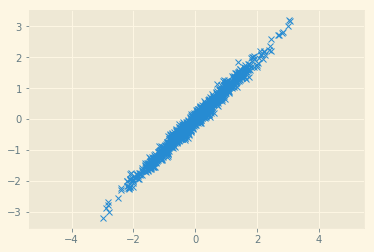

Mutual information 4
Pearson correlation 0.9998322546167919


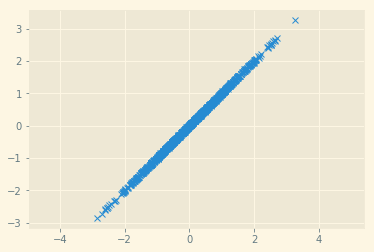

Mutual information 8
Pearson correlation 0.9999999437324111


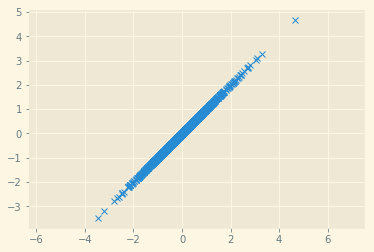

Mutual information 16
Pearson correlation 0.9999999999999937


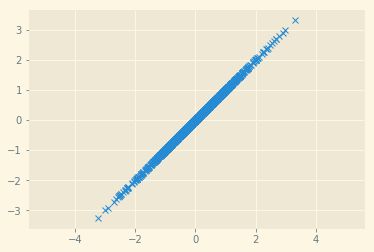

Mutual information 32
Pearson correlation 1.0


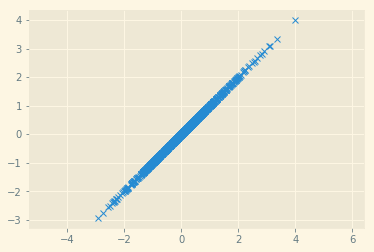

In [3]:
import math

# https://en.wikipedia.org/wiki/Mutual_information#Linear_correlation
def mutual_information_to_pearson(mutual_information):
  return math.sqrt(1 - math.exp(-2 * mutual_information))

def plot_bivariate_normal_with_mutual_information(mutual_information, size):
  r = mutual_information_to_pearson(mutual_information)
  print("Mutual information", mutual_information)
  print("Pearson correlation", r)
  plot_bivariate_normal_with_correlation(r, size)
  
mutual_information = [0, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32]
pearson_correlation = [mutual_information_to_pearson(x) for x in mutual_information]

print("Mutual Information scales to noise: correlation of 0.47 is half the information of 0.62")
plt.plot(mutual_information, pearson_correlation, 'x')
plt.show()

size = 1000
for x in mutual_information:
  plot_bivariate_normal_with_mutual_information(x, size)